Trains a simple deep NN on the IRIS dataset.



In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
def hist_view(hist):
  print('## training loss and acc ##')
  fig, loss_ax = plt.subplots()
  acc_ax = loss_ax.twinx()

  loss_ax.plot(hist.history['loss'], 'y', label='train loss')
  loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

  loss_ax.set_xlabel('epoch')
  loss_ax.set_ylabel('loss')
  loss_ax.legend(loc='center')

  acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
  acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')
  acc_ax.set_ylabel('accuracy')
  acc_ax.legend(loc='center right')

  plt.show()

In [ ]:
batch_size = 50
num_classes = 3
epochs = 200

In [ ]:
import pandas as pd
![ ! -f  iris0.csv ]&&wget http://j.finfra.com/_file/iris0.csv
iris=pd.read_csv("iris0.csv")
iris

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
# Shuffling
iriss=iris.sample(frac=1).reset_index(drop=True)
iris_train=iriss.iloc[0:100,:]
iris_test=iriss.iloc[100:150,:]

x_train=iris_train.iloc[:,0:4].values
x_test=iris_test.iloc[:,0:4].values
y_train=iris_train.iloc[:,4:5]
y_test=iris_test.iloc[:,4:5]

sets=iris.iloc[:,4:5].drop_duplicates()["Species"].tolist()
encoder={k:v for v,k in enumerate(sets)}
y_train=[ encoder[i] for i in y_train["Species"].tolist() ]
y_train = keras.utils.to_categorical(y_train, num_classes)

y_test=[ encoder[i] for i in y_test["Species"].tolist() ]
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
# 데이터 shape 을 확인해 봅니다.
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

In [ ]:
model = Sequential()
model.add(Dense(5, activation='relu', input_shape=(4,)))
model.add(Dense(5, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()
model.save('tmp.h5')


In [97]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


Test loss: 0.7399054169654846
Test accuracy: 0.5600000023841858
## training loss and acc ##


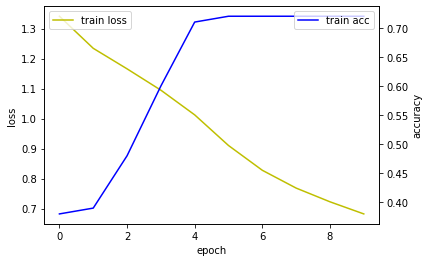

In [ ]:
model.load_weights('tmp.h5')
hist = model.fit(x_train, y_train,
                    batch_size=10,
                    epochs=10,
                    verbose=0,
                    validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
hist_view(hist)


Test loss: 0.5531213879585266
Test accuracy: 0.8600000143051147
## training loss and acc ##


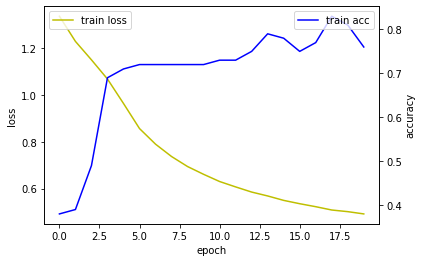

In [ ]:
model.load_weights('tmp.h5')
hist = model.fit(x_train, y_train,
                    batch_size=10,
                    epochs=20,
                    verbose=0,
                    validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
hist_view(hist)


Test loss: 0.4164692163467407
Test accuracy: 0.8999999761581421
## training loss and acc ##


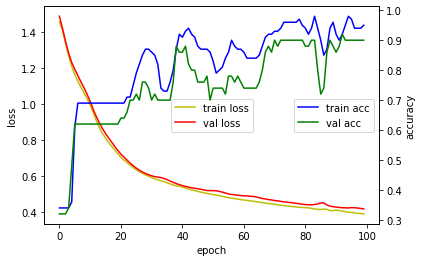

In [104]:
model.load_weights('tmp.h5')
hist = model.fit(x_train, y_train,
                    epochs=100,
                    verbose=0,
                    validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
hist_view(hist)


In [ ]:
hist.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Epoch 1/10
10/10 [==============================] - 0s 4ms/step - loss: 1.3778 - accuracy: 0.3400 - val_loss: 1.3693 - val_accuracy: 0.3200
Epoch 2/10
10/10 [==============================] - 0s 3ms/step - loss: 1.2665 - accuracy: 0.3600 - val_loss: 1.2793 - val_accuracy: 0.4000
Epoch 3/10
10/10 [==============================] - 0s 3ms/step - loss: 1.1684 - accuracy: 0.5500 - val_loss: 1.1701 - val_accuracy: 0.6000
Epoch 4/10
10/10 [==============================] - 0s 3ms/step - loss: 1.0628 - accuracy: 0.6600 - val_loss: 1.0481 - val_accuracy: 0.6200
Epoch 5/10
10/10 [==============================] - 0s 3ms/step - loss: 0.9400 - accuracy: 0.6900 - val_loss: 0.9417 - val_accuracy: 0.6200
Epoch 6/10
10/10 [==============================] - 0s 2ms/step - loss: 0.8513 - accuracy: 0.6900 - val_loss: 0.8617 - val_accuracy: 0.6200
Epoch 7/10
10/10 [==============================] - 0s 2ms/step - loss: 0.7896 - accuracy: 0.6900 - val_loss: 0.8015 - val_accuracy: 0.6200
Epoch 8/10
10/10 [==

Test loss: 0.7002154588699341
Test accuracy: 0.6600000262260437
## training loss and acc ##


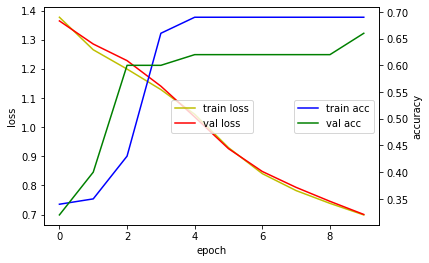

In [ ]:

model.load_weights('tmp.h5')
hist = model.fit(x_train, y_train,
                    batch_size=10,
                    epochs=10,
                    verbose=0,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
hist_view(hist)


Test loss: 0.4183339774608612
Test accuracy: 0.800000011920929
## training loss and acc ##


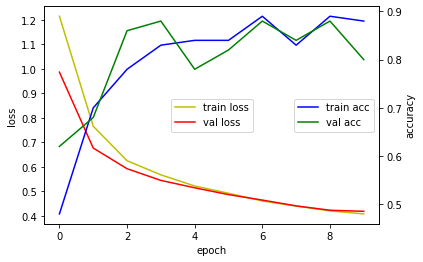

In [98]:

model.load_weights('tmp.h5')
hist = model.fit(x_train, y_train,
                    batch_size=1,
                    epochs=10,
                    verbose=0,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
hist_view(hist)


Test loss: 1.364409327507019
Test accuracy: 0.3199999928474426
## training loss and acc ##


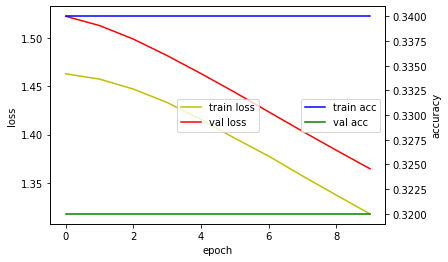

In [99]:

model.load_weights('tmp.h5')
hist = model.fit(x_train, y_train,
                    batch_size=50,
                    epochs=10,
                    verbose=0,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
hist_view(hist)


Test loss: 1.4010792970657349
Test accuracy: 0.3199999928474426
## training loss and acc ##


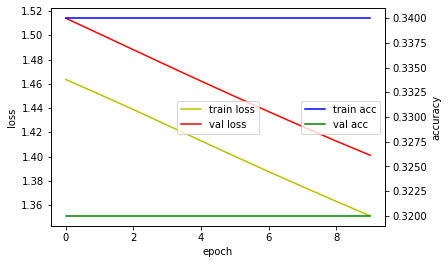

In [100]:

model.load_weights('tmp.h5')
hist = model.fit(x_train, y_train,
                    batch_size=100,
                    epochs=10,
                    verbose=0,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
hist_view(hist)


Test loss: 0.18022720515727997
Test accuracy: 0.9200000166893005
## training loss and acc ##


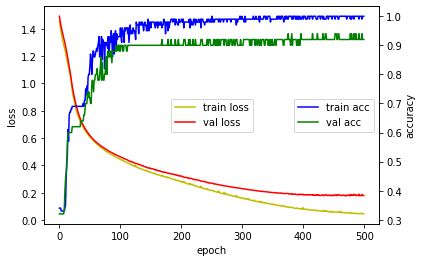

In [ ]:

model.load_weights('tmp.h5')
hist = model.fit(x_train, y_train,
                    batch_size=50,
                    epochs=500,
                    verbose=0,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
hist_view(hist)


Test loss: 0.24634277820587158
Test accuracy: 0.9399999976158142
## training loss and acc ##


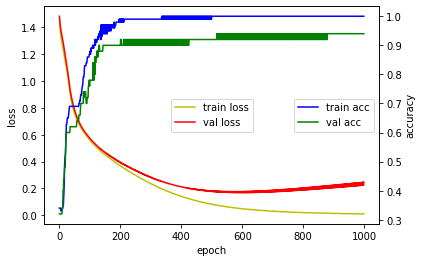

In [ ]:

model.load_weights('tmp.h5')
hist = model.fit(x_train, y_train,
                    batch_size=100,
                    epochs=1000,
                    verbose=0,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
hist_view(hist)


Epoch 1/10
2/2 [==============================] - 0s 21ms/step - loss: 1.4599 - accuracy: 0.3400 - val_loss: 1.4716 - val_accuracy: 0.3200
Epoch 2/10
2/2 [==============================] - 0s 9ms/step - loss: 1.4081 - accuracy: 0.3300 - val_loss: 1.4375 - val_accuracy: 0.3200
Epoch 3/10
2/2 [==============================] - 0s 9ms/step - loss: 1.3746 - accuracy: 0.3300 - val_loss: 1.4192 - val_accuracy: 0.3200
Epoch 4/10
2/2 [==============================] - 0s 10ms/step - loss: 1.3540 - accuracy: 0.3300 - val_loss: 1.3964 - val_accuracy: 0.3200
Epoch 5/10
2/2 [==============================] - 0s 9ms/step - loss: 1.3315 - accuracy: 0.3300 - val_loss: 1.3736 - val_accuracy: 0.3200
Epoch 6/10
2/2 [==============================] - 0s 10ms/step - loss: 1.3101 - accuracy: 0.3300 - val_loss: 1.3544 - val_accuracy: 0.3200
Epoch 7/10
2/2 [==============================] - 0s 9ms/step - loss: 1.2915 - accuracy: 0.3300 - val_loss: 1.3333 - val_accuracy: 0.3200
Epoch 8/10
2/2 [===============

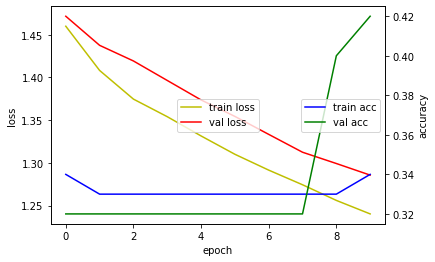

In [96]:

model.load_weights('tmp.h5')
hist = model.fit(x_train, y_train,
                    batch_size=90,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
hist_view(hist)


Test loss: 0.4137970209121704
Test accuracy: 0.8999999761581421
## training loss and acc ##


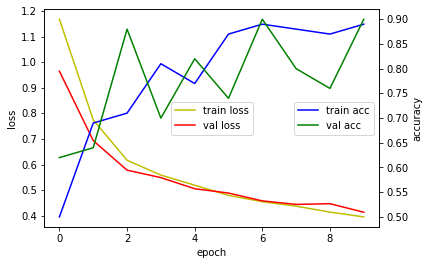

In [101]:
# adam

model.load_weights('tmp.h5')
hist = model.fit(x_train, y_train,
                    batch_size=1,
                    epochs=10,
                    verbose=0,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
hist_view(hist)


Test loss: 0.3647236227989197
Test accuracy: 0.8999999761581421
## training loss and acc ##


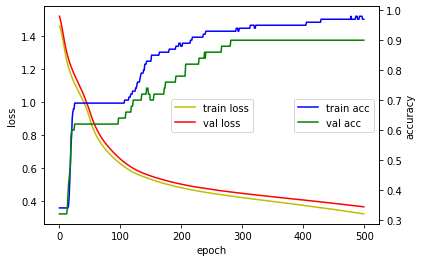

In [102]:

model.load_weights('tmp.h5')
hist = model.fit(x_train, y_train,
                    batch_size=50,
                    epochs=500,
                    verbose=0,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
hist_view(hist)


Test loss: 0.2756430506706238
Test accuracy: 0.8999999761581421
## training loss and acc ##


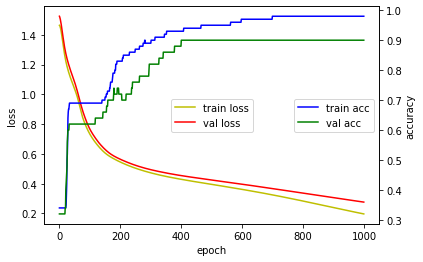

In [103]:

model.load_weights('tmp.h5')
hist = model.fit(x_train, y_train,
                    batch_size=100,
                    epochs=1000,
                    verbose=0,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
hist_view(hist)
